## Import Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [4]:
index_train = np.load('/content/drive/MyDrive/collaborations/suicide/train_id-1.npy')
index_test = np.load('/content/drive/MyDrive/collaborations/suicide/test_id-1.npy')
len(index_test), len(index_train)

(227, 255)

In [5]:
xls = pd.ExcelFile('/content/drive/MyDrive/collaborations/suicide/DEIDCFISSAEforMachineLearningNormalizedfollowup(11-9-21).xlsx')
df_data = pd.read_excel(xls, 'Without formula')

df_data=df_data.replace(np.nan,-1)

In [6]:
df_data

,,Enrollment Log Number,Enrollment Date,Age at first initial encounter (years),Race,Ethnicity,cfi1,cfi2,cfi3,cfi4,cfi5,cfi6,cfi7,cfi8,cfi9,cfi10,cfi11,cfi12,cfi13,cfi14,cfi15,cfi16,cfi17,cfi18,cfi19,cfi20,cfi21,cfi22,Number of CFI questions answered yes,Unnamed: 29,CFIS,Enrollment Log Number.1,SI,Date of Event,Months since first Encounter,DateofEvent,Months since first Encounter.1,DateofEvent.1,Months since first Encounter.2,DateofEvent.2,...,Months since first Encounter.77,DateofEvent.77,Months since first Encounter.78,DateofEvent.78,Months since first Encounter.79,SC,Date.1,Hospitalization,DateofEvent.79,Months since first Encounter.80,DateofEvent.80,Months since first Encounter.81,DateofEvent.81,Months since first Encounter.82,DateofEvent.82,Months since first Encounter.83,DateofEvent.83,Months since first Encounter.84,DateofEvent.84,Months since first Encounter.85,DateofEvent.85,Months since first Encounter.86,DateofEvent.86,Months since first Encounter.87,DateofEvent.87,Months since first Encounter.88,DateofEvent.88,Months since first Encounter.89,DateofEvent.89,Months since first Encounter.90,DateofEvent.90,Months since first Encounter.91,DateofEvent.91,Months since first Encounter.92,DateofEvent.92,Months since first Encounter.93,DateofEvent.93,Months since first Encounter.94,DateofEvent.94,Months since first Encounter.95
0,184,EZ,42632,54,White,Non-Hispanic,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,4,22,0.181818,EZ,0,-1.000000e+00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1,EZ0001,42538,28,Black or African American,Non-Hispanic,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0.0,0,1.0,16,22,0.727273,EZ0001,0,-1.000000e+00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,2,EZ1002,42538,60,Black or African American,Non-Hispanic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0,0.0,2,22,0.090909,EZ1002,0,-1.000000e+00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,3,EZ1003,42541,46,White,Hispanic,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0.0,0,1.0,12,22,0.545455,EZ1003,0,-1.000000e+00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,4,EZ1004,42541,49,Black or African American,Non-Hispanic,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,1,22,0.045455,EZ1004,0,-1.000000e+00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,591,EZ1591,42913,49,White,Non-Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,0.0,0,0.0,15,22,0.681818,EZ1591,0,-1.000000e+00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-

In [9]:
df_data.iloc[0:16,6:31]

,cfi1,cfi2,cfi3,cfi4,cfi5,cfi6,cfi7,cfi8,cfi9,cfi10,cfi11,cfi12,cfi13,cfi14,cfi15,cfi16,cfi17,cfi18,cfi19,cfi20,cfi21,cfi22,Number of CFI questions answered yes,Unnamed: 29,CFIS
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,4,22,0.181818
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0.0,0,1.0,16,22,0.727273
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0,0.0,2,22,0.090909
3,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0.0,0,1.0,12,22,0.545455
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,1,22,0.045455
5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,1,0.0,7,22,0.318182
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,2,22,0.090909
7,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0.0,0,1.0,13,22,0.590909
8,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,4,22,0.181818
9,1.0,0.0,-1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,1,0.0,0,0.0,11,20,0.550000


In [100]:
# id = df_data.iloc[:491,0].values
id = df_data.iloc[:491,1].values
# id

In [11]:
data = df_data.iloc[:491,6:31].values
data.shape, data

((482, 25), array([[ 1.        ,  0.        ,  0.        , ...,  4.        ,
         22.        ,  0.18181818],
        [ 0.        ,  1.        ,  1.        , ..., 16.        ,
         22.        ,  0.72727273],
        [ 0.        ,  0.        ,  0.        , ...,  2.        ,
         22.        ,  0.09090909],
        ...,
        [ 1.        ,  0.        ,  0.        , ...,  6.        ,
         21.        ,  0.28571429],
        [ 0.        ,  0.        ,  0.        , ...,  8.        ,
         22.        ,  0.36363636],
        [ 0.        ,  0.        ,  0.        , ...,  5.        ,
         22.        ,  0.22727273]]))

In [14]:
data.shape

(482, 25)

In [15]:
df_data.iloc[0:16,32]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
Name: SI, dtype: int64

In [18]:
label = df_data.iloc[:,32].values
label = np.array([1 if i > 0 else 0 for i in label])
len(label), label

(482, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0

## Visualize Discovery and Test Cohorts

In [98]:
id_index_train = []
for ind in index_train:
  id_index_train.append(np.where(id == ind)[0][0])
# id_index_train

In [99]:
id_index_test = []
for ind in index_test:
  id_index_test.append(np.where(id == ind)[0][0])
# id_index_test

In [21]:
len(id_index_train), len(id_index_test)

(255, 227)

In [22]:
train_data = data[id_index_train]
train_label = label[id_index_train]
train_data.shape, len(train_label), train_data

((255, 25),
 255,
 array([[ 1.        ,  0.        ,  0.        , ...,  4.        ,
         22.        ,  0.18181818],
        [ 0.        ,  1.        ,  1.        , ..., 16.        ,
         22.        ,  0.72727273],
        [ 0.        ,  0.        ,  0.        , ...,  2.        ,
         22.        ,  0.09090909],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., 12.        ,
         20.        ,  0.6       ],
        [ 0.        ,  0.        ,  0.        , ...,  7.        ,
         21.        ,  0.33333333],
        [ 0.        ,  0.        ,  0.        , ...,  5.        ,
         22.        ,  0.22727273]]))

In [23]:
test_data = data[id_index_test]
test_label = label[id_index_test]
test_data.shape, len(test_label), test_data

((227, 25),
 227,
 array([[ 0.        ,  0.        ,  1.        , ..., 10.        ,
         22.        ,  0.45454545],
        [ 1.        ,  0.        ,  1.        , ..., 17.        ,
         22.        ,  0.77272727],
        [ 0.        ,  0.        ,  0.        , ...,  9.        ,
         22.        ,  0.40909091],
        ...,
        [ 1.        ,  1.        ,  1.        , ..., 15.        ,
         21.        ,  0.71428571],
        [ 1.        ,  0.        ,  0.        , ...,  6.        ,
         21.        ,  0.28571429],
        [ 0.        ,  0.        ,  0.        , ...,  8.        ,
         22.        ,  0.36363636]]))

In [24]:
CFI_train = train_data[:,-1]
CFI_test = test_data[:,-1]
# MS_train = train_data[:,-1]
# MS_test = test_data[:,-1]
CFI_score = np.reshape(data[:,-1],(len(data[:,-1]),1))
CFI_score.shape

(482, 1)

### Visualizing data

Text(0, 0.5, 'CFI-S')

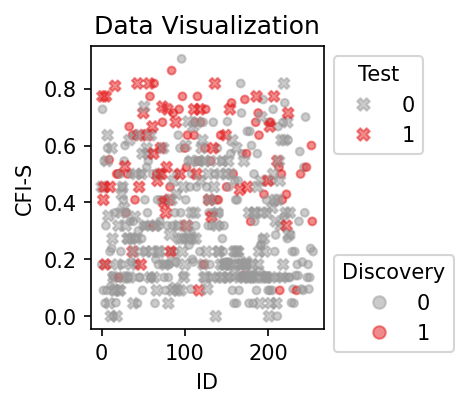

In [95]:
import matplotlib.pyplot as plt 
x_train = range(len(CFI_train))
x_test = range(len(CFI_test))
# y = CFI_score
colors_train = np.array(train_label)
colors_test = np.array(test_label)
fig,ax = plt.subplots(figsize=(2,2.5),dpi = 150)
scatter1 = plt.scatter(x_train, CFI_train, c=colors_train, alpha=0.5,
            cmap='Set1_r', label = colors_train, s=14)
legend1 = plt.legend(*scatter1.legend_elements(),
                    bbox_to_anchor=(1.0, 0.3), loc=2,title="Discovery")
ax = plt.gca().add_artist(legend1)
scatter = plt.scatter(x_test, CFI_test, c=colors_test, alpha=0.5,
            cmap='Set1_r', label = colors_test, marker = 'X',s=28)

legend = plt.legend(*scatter.legend_elements(),
                    bbox_to_anchor=(1.0, 1), loc=2, title="Test")
plt.title('Data Visualization')
# plt.legend(legend1)
# plt.colorbar();  # show color scale
plt.xlabel('ID')
plt.ylabel('CFI-S')
# print(sum(label_train)/len(label_train), sum(label_test)/len(label_test))

In [ ]:
!pip uninstall umap
!pip install umap-learn

     |████████████████████████████████| 86 kB 2.4 MB/s 
     |████████████████████████████████| 1.1 MB 10.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=bb1ccd3260f60232c1e34ac4b61b2ad77c0e5c205e144a0f69761ecf6a346d5e
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=3354e970607f40b0ee46610361ccfae9943ae062a5715d58d81b0c57c0d88e48
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


Text(0, 0.5, 'Embedding 1')

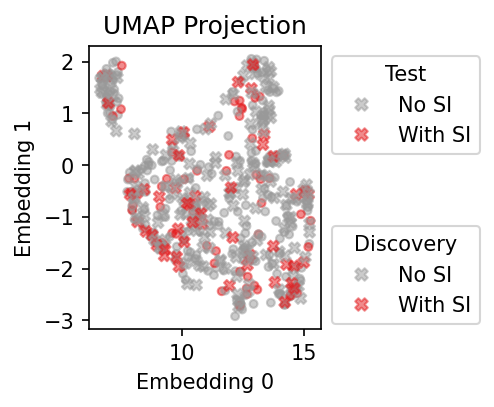

In [ ]:
# import umap
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP()
scaled_data = StandardScaler().fit_transform(data)
embedding = reducer.fit_transform(scaled_data)
print(embedding.shape)

colors_train = ['With SI' if i == 1 else 'No SI' for i in np.array(train_label)]
colors_test = ['With SI' if i == 1 else 'No SI' for i in np.array(test_label)]

fig,ax = plt.subplots(figsize=(2,2.5),dpi = 150)
scatter1 = plt.scatter(
    embedding[:len(train_data), 0],
    embedding[:len(train_data), 1],
    cmap='Set1_r',
    alpha=0.5,
    c=train_label,
    label=colors_train,
    s = 14)
# plt.legend()
legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=colors_test,
                    bbox_to_anchor=(1.0, 0.4), loc=2,title="Discovery")
ax = plt.gca().add_artist(legend1)

scatter = plt.scatter(
    embedding[len(train_data):, 0],
    embedding[len(train_data):, 1],
    cmap='Set1_r',
    alpha=0.5,
    c=test_label,
    label=colors_test,
    marker = 'X',
    s = 28)
legend = plt.legend(handles=scatter.legend_elements()[0], labels=colors_test,bbox_to_anchor=(1.0, 1), loc=2,title="Test")

# legend = plt.legend(*scatter.legend_elements(),
#                     bbox_to_anchor=(1.0, 1), loc=2, title="Test")
# plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP Projection')
plt.xlabel('Embedding 0')
plt.ylabel('Embedding 1')
# plt.legend()

## Network Visualization

In [25]:
labels = label
nodes = []
X= data ## Node Features Matrix
N=X.shape[0] ## the number of nodes
F=X.shape[1] ## the number of features
print(N,F)
print(len(labels))

482 25
482


In [26]:
from scipy import spatial
A = np.zeros((N,N))
for i in range(N):
  for j in range(N):
    distance = spatial.distance.cosine(list(X[i]), list(X[j]))
    if 0<distance < 0.005:
      A[i,j]=distance
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
import networkx as nx    
import matplotlib
cmap = matplotlib.colors.ListedColormap(['lightsteelblue', 'wheat', 'red'])                                 
G =  nx.from_numpy_matrix(A)
print(nx.info(G))

a = (A > 0).astype(np.int_).sum(axis=1)*10
# a

Graph with 482 nodes and 3619 edges


Blue and yellow dots are patients without and with SI in our dataset. The red dot is where you are.


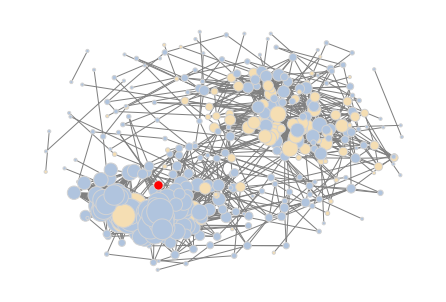

In [97]:
label[-1] = 2
my_pos = nx.spring_layout(G, seed = 100)
nx.draw(G, node_size=a, node_color=label, edgecolors='lightgrey',with_labels=False,cmap=cmap, pos=my_pos,edge_color='grey')
# nx.write_gexf(G, "test.gexf")
print('Blue and yellow dots are patients without and with SI in our dataset. The red dot is where you are.')

## Predict your SI

### Data preparation

In [30]:
import tensorflow as tf
label_onehot = np.array(tf.one_hot(labels, depth=2))

In [31]:
!pip install stellargraph

     |████████████████████████████████| 435 kB 5.1 MB/s 


In [32]:
import pandas as pd
import os

import stellargraph as sg
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN

from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [33]:
from stellargraph import StellarGraph
# square = StellarGraph.from_networkx(G)
square = G.copy()
def compute_features(node_id):
    # in general this could compute something based on other features, but for this example,
    # we don't have any other features, so we'll just do something basic with the node_id
    # print(X[node_id].shape)
    return X[node_id]


for node_id, node_data in square.nodes(data=True):
    # print(node_id)
    node_data["feature"] = compute_features(node_id)

In [34]:
G_stellar = StellarGraph.from_networkx(square, node_features="feature")
print(G_stellar.info())

StellarGraph: Undirected multigraph
 Nodes: 482, Edges: 3619

 Node types:
  default: [482]
    Features: float32 vector, length 25
    Edge types: default-default->default

 Edge types:
    default-default->default: [3619]
        Weights: range=[0.00113043, 0.00499075], mean=0.00364217, std=0.000864459
        Features: none


In [35]:
G_stellar.nodes()

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            472, 473, 474, 475, 476, 477, 478, 479, 480, 481],
           dtype='int64', length=482)

In [36]:
generator = FullBatchNodeGenerator(G_stellar, method="gcn")

Using GCN (local pooling) filters...


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(range(len(X)), label_onehot, test_size=0.3, random_state=42)
train_gen = generator.flow(X_train, y_train)
val_gen = generator.flow(X_test, y_test)
test_gen = generator.flow([len(X)-1],[label_onehot[-1]])

### Model define

In [54]:
gcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=generator, dropout=0.5
)

In [55]:
x_inp, x_out = gcn.in_out_tensors()

x_out

<KerasTensor: shape=(1, None, 16) dtype=float32 (created by layer 'gather_indices')>

In [56]:
predictions = layers.Dense(units=2, activation="softmax")(x_out)

In [57]:
model = Model(inputs=x_inp, outputs=predictions)
model.compile(
    optimizer=optimizers.Adam(lr=0.01),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [58]:
from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(monitor="val_acc", patience=50, restore_best_weights=True)

### Model Training

In [59]:
history = model.fit(
    train_gen,
    epochs=200,
    validation_data=val_gen,
    verbose=2,
    shuffle=False,  # this should be False, since shuffling data means shuffling the whole graph
    callbacks=[es_callback],
)

Epoch 1/200
1/1 - 1s - loss: 1.0377 - acc: 0.7448 - val_loss: 0.5241 - val_acc: 0.7862 - 1s/epoch - 1s/step
Epoch 2/200
1/1 - 0s - loss: 0.8358 - acc: 0.6439 - val_loss: 0.5008 - val_acc: 0.7862 - 60ms/epoch - 60ms/step
Epoch 3/200
1/1 - 0s - loss: 0.7601 - acc: 0.6677 - val_loss: 0.4431 - val_acc: 0.7862 - 67ms/epoch - 67ms/step
Epoch 4/200
1/1 - 0s - loss: 0.6405 - acc: 0.7448 - val_loss: 0.4250 - val_acc: 0.7862 - 59ms/epoch - 59ms/step
Epoch 5/200
1/1 - 0s - loss: 0.6832 - acc: 0.7300 - val_loss: 0.4126 - val_acc: 0.8000 - 66ms/epoch - 66ms/step
Epoch 6/200
1/1 - 0s - loss: 0.7159 - acc: 0.7389 - val_loss: 0.4178 - val_acc: 0.7862 - 60ms/epoch - 60ms/step
Epoch 7/200
1/1 - 0s - loss: 0.6152 - acc: 0.7478 - val_loss: 0.4640 - val_acc: 0.7724 - 56ms/epoch - 56ms/step
Epoch 8/200
1/1 - 0s - loss: 0.5529 - acc: 0.7567 - val_loss: 0.4948 - val_acc: 0.7448 - 62ms/epoch - 62ms/step
Epoch 9/200
1/1 - 0s - loss: 0.5606 - acc: 0.7329 - val_loss: 0.4931 - val_acc: 0.7655 - 68ms/epoch - 68ms/s

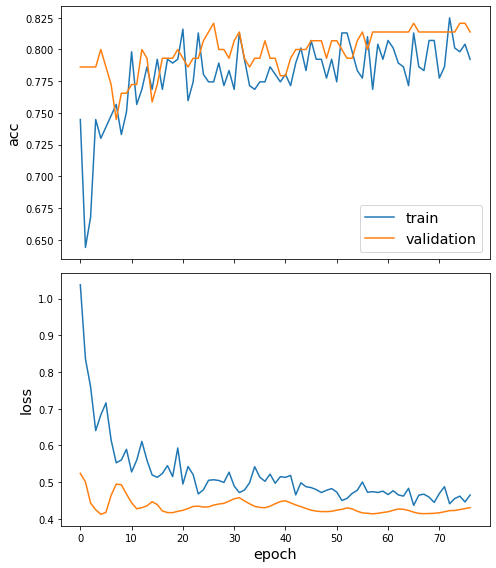

In [60]:
sg.utils.plot_history(history)

In [61]:
test_loss, test_acc = model.evaluate(val_gen)
test_acc

1/1 [==============================] - 0s 44ms/step - loss: 0.4377 - acc: 0.8207


0.8206896781921387

### **Model training results**

In [62]:
from sklearn.metrics import classification_report
import sklearn
target_names = ['class 0', 'class 1']
predictions = model.predict(val_gen)
y_pred = tf.math.argmax(predictions[0],axis=1)
print(classification_report(tf.math.argmax(y_test,axis=1), y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.84      0.96      0.89       114
     class 1       0.67      0.32      0.43        31

    accuracy                           0.82       145
   macro avg       0.75      0.64      0.66       145
weighted avg       0.80      0.82      0.80       145



In [101]:
from sklearn.metrics import roc_auc_score
print("AUROC: ",roc_auc_score(y_test, predictions[0]))

AUROC:  0.8160724391624221


## **Your result**

In [90]:
prob_without_SI, prob_with_SI = model.predict(test_gen)[0][0]
print('SI probability: {:.2%}'.format(prob_with_SI))

SI probability: 17.65%
